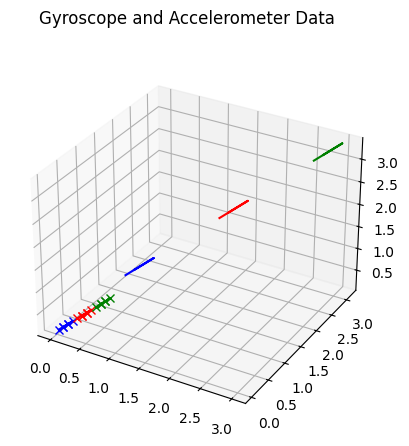

gyroscope_data shape (3, 6, 3)
accelerometer_data shape (3, 6, 3)


In [64]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Sample data
data = [
    {
        "activity": "walking",
        "gyroscope": [
            [0.05, 0.10, 0.15],
            [0.10, 0.15, 0.20],
            [0.15, 0.20, 0.25],
            [0.10, 0.15, 0.20],
            [0.05, 0.10, 0.15],
            [0.00, 0.05, 0.10],
        ],
        "accelerometer": [
            [0.8, 0.9, 1.2],  
            [0.9, 1.0, 1.3],  
            [1.0, 1.1, 1.4],
            [0.9, 1.0, 1.3],  
            [0.8, 0.9, 1.2],  
            [0.7, 0.8, 1.1],
        ],
        "color": "b",
    },
    {
        "activity": "running",
        "gyroscope": [
            [0.25, 0.30, 0.35],
            [0.30, 0.35, 0.40],
            [0.35, 0.40, 0.45],
            [0.30, 0.35, 0.40],
            [0.25, 0.30, 0.35],
            [0.20, 0.25, 0.30],
        ],
        "accelerometer": [
            [1.8, 1.9, 2.2],  
            [1.9, 2.0, 2.3],  
            [2.0, 2.1, 2.4],
            [1.9, 2.0, 2.3],  
            [1.8, 1.9, 2.2],  
            [1.7, 1.8, 2.1],
        ],
        "color": "r",
    },
    {
        "activity": "jumping",
        "gyroscope": [
            [0.45, 0.50, 0.55],
            [0.50, 0.55, 0.60],
            [0.55, 0.60, 0.65],
            [0.50, 0.55, 0.60],
            [0.45, 0.50, 0.55],
            [0.40, 0.45, 0.50],
        ],
        "accelerometer": [
            [2.8, 2.9, 3.2],  
            [2.9, 3.0, 3.3],  
            [3.0, 3.1, 3.4],
            [2.9, 3.0, 3.3],  
            [2.8, 2.9, 3.2],  
            [2.7, 2.8, 3.1],
        ],
        "color": "g",
    },
]

# Extract features and labels
gyroscope_data = np.array([data["gyroscope"] for data in data])
accelerometer_data = np.array([data["accelerometer"] for data in data])
labels =  LabelEncoder().fit_transform([data["activity"] for data in data])

fig = plt.figure()
fig.suptitle("Gyroscope and Accelerometer Data")
ax = fig.add_subplot(projection="3d")

for i in range(len(gyroscope_data)):
    gyroscope = gyroscope_data[i]
    accelerometer = accelerometer_data[i]
    label = labels[i]

    ax.plot(gyroscope[:, 0], gyroscope[:, 1], gyroscope[:, 2], color=data[i]["color"], marker="x")
    ax.plot(accelerometer[:, 0], accelerometer[:, 1], accelerometer[:, 2], color=data[i]["color"])

plt.show()
print("gyroscope_data shape", gyroscope_data.shape)
print("accelerometer_data shape", accelerometer_data.shape)

In [61]:
# Normalize the data
scaler = StandardScaler()
gyroscope_data = scaler.fit_transform(gyroscope_data.reshape(-1, 3)).reshape(
    -1, gyroscope_data.shape[1], len(labels)
)
accelerometer_data = scaler.fit_transform(accelerometer_data.reshape(-1, 3)).reshape(
    -1, accelerometer_data.shape[1], len(labels)
)

In [67]:
import tensorflow as tf
from keras import Model
from keras._tf_keras.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, Concatenate, Input

gyroscope_input = Input(shape=(gyroscope_data.shape[1], gyroscope_data.shape[2]))
accelerometer_input = Input(shape=(accelerometer_data.shape[1], accelerometer_data.shape[2]))

<KerasTensor shape=(None, 6, 3), dtype=float32, sparse=None, name=keras_tensor_6>
